<a id="1"></a>
# <a id='toc1_'></a><div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a6199; overflow:hidden"><b> 🧠  TP1 - Quantification des modèles IA </b>

Ce notebook démontre comment appliquer des techniques de **quantification** aux modèles IA pour améliorer leurs performances et réduire leur taille. Vous apprendrez :
- Les concepts clés de la **quantification des modèles**.
- L'application de la quantification sur un exemple simple.
- La quantification d'un modèle d'image plus complexe.



  ---
  ### <a id='toc1_1_1_'></a>[**Table des matières**](#toc0_)

- [1. Introduction à la quantification](#toc1_)    
  - [1.1 Types de quantification](#toc3_)    
  - [1.2 Les compromis à prendre en compte](#toc4_)    
- [🔍 2. Échauffement : Bases de la quantification](#toc5_)    
  - [2.1 Création d'une série de valeurs](#toc6_)    
  - [2.2 Quantification Asymétrique](#toc7_)    
  - [2.3 Quantification Symétrique](#toc8_)    
  - [2.4 Méthode de quantification par Percentile](#toc9_)    
  - [2.5 Comparaison : Symetrique, Asymetrique, Min-Max , Percentile](#toc10_)    
  - [2.6 Analyse de l'impact du nombre des bits sur l'erreur](#toc11_)    
- [🖼️ 3. Application aux Modèles Complexes](#toc12_)    
  - [3.1 Quantification aprés entrainement (Post Training Quantization PTQ)](#toc13_)    
  - [3.2 Quantification pendant l'entraînement (Quantization Aware Training)](#toc22_)    
 
- [📊 4. Évaluation et comparaison](#toc25_)    
  - [4.1 Comparaison des tailles et des performances des modèles](#toc26_)    
  - [4.2 Conclusion](#toc29_)      
- [Bonus](#toc32_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
  ---

# <a id='toc2_'></a>[<div style="text-align:center; border-radius:8px; padding:8px; color:white; margin:10px 0; font-size:100%; font-family:Arial, sans-serif; background-color:#1E90FF;"><b>1. Introduction à la quantification</b></div>](#toc2_)
# 

En traitement du signal numérique, la quantification fait généralement référence à la conversion d’un signal continu, comme la lumière ou le son, en un ensemble de valeurs numériques discrètes. Dans le domaine de l’apprentissage profond, la quantification désigne généralement la conversion de nombres en virgule flottante signée en précision simple (float32) en un format numérique de précision inférieure, tel qu’un entier non signé sur 8 bits (uint8). Elle permet :

- Une **réduction de la taille des modèles**.
- Une **accélération des inférences**.
- Un **support pour le matériel contraint** (par exemple : IoT, téléphones mobiles).

# <a id='toc3_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b>1.1 Types de quantification</b></div>](#toc3_)


<img src="./sources/types_quant.png" alt="typesQuant" width="700">

# <a id='toc4_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b>1.2 Les compromis à prendre en compte</b></div>](#toc4_)



1. **Taille du modèle :**
   - Réduction typique de 75% pour des poids convertis de Float32 à INT8.

2. **Précision :**
   - La quantification peut entraîner une perte de précision due à l’arrondi des valeurs.
   - **Symétrique :** Plus adaptée pour les poids distribués autour de zéro.
   - **Asymétrique :** Utile pour préserver la précision des activations positives.

3. **Vitesse :**
   - Les modèles quantifiés sont plus rapides en inférence, surtout sur des processeurs spécialisés (comme les DSP ou TPU).

4. **Compatibilité matérielle :**
   - Certains matériels favorisent la quantification asymétrique pour les activations.

---

# <a id='toc5_'></a>[<div style="text-align:center; border-radius:8px; padding:8px; color:white; margin:10px 0; font-size:100%; font-family:Arial, sans-serif; background-color:#1E90FF;"><b>🔍 2. Échauffement : Bases de la quantification</b></div>](#toc5_)
# 

  ---
  ### <a id='toc1_1_1_'></a>[**Table des matières**](#toc0_)

- [1. Introduction à la quantification](#toc1_)    
  - [1.1 Types de quantification](#toc3_)    
  - [1.2 Les compromis à prendre en compte](#toc4_)    
- [🔍 2. Échauffement : Bases de la quantification](#toc5_)    
  - [2.1 Création d'une série de valeurs](#toc6_)    
  - [2.2 Quantification Asymétrique](#toc7_)    
  - [2.3 Quantification Symétrique](#toc8_)    
  - [2.4 Méthode de quantification par Percentile](#toc9_)    
  - [2.5 Comparaison : Symetrique, Asymetrique, Min-Max , Percentile](#toc10_)    
  - [2.6 Analyse de l'impact du nombre des bits sur l'erreur](#toc11_)    
- [🖼️ 3. Application aux Modèles Complexes](#toc12_)    
  - [3.1 Quantification aprés entrainement (Post Training Quantization PTQ)](#toc13_)    
  - [3.2 Quantification pendant l'entraînement (Quantization Aware Training)](#toc22_)    
 
- [📊 4. Évaluation et comparaison](#toc25_)    
  - [4.1 Comparaison des tailles et des performances des modèles](#toc26_)    
  - [4.2 Conclusion](#toc29_)      
- [Bonus](#toc32_)    

<!-- vscode-jupyter-toc-config
   numbering=false
   anchor=true
   flat=false
   minLevel=1
   maxLevel=6
   /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
  ---

Le programme Python à developper permet de mettre en œuvre les techniques de quantification **symétrique** et **asymétrique** sur une série de valeurs. L'objectif est de comprendre les effets de la quantification sur les données et d'évaluer les erreurs associées.

---

### Étapes à suivre :

1. **Création d'une série de valeurs :**
   - Générer un vecteur aléatoire ou utiliser un ensemble fixe de valeurs.

2. **Quantification :**
   - Implémenter les méthodes de quantification symétrique et asymétrique.
   - Tester pour différents intervalles $[\alpha, \beta]$.

1. **Déquantification :**
   - Revenir aux valeurs approximatives dans l'échelle initiale.

2. **Calcul de l'erreur de quantification :**
   - Calculer l'erreur quadratique moyenne (MSE) pour chaque méthode de quantification.

---

### Résultats attendus :
- Afficher les valeurs originales, quantifiées, et déquantifiées.
- Visualiser les erreurs de quantification sous forme graphique.
- Calculer et comparer les erreurs entre les deux méthodes.
- L'erreur sera calculée en utilisant la formule suivante :
$  MSE = \frac{1}{n} \sum_{i=1}^n \left( x_{\text{original}, i} - x_{\text{déquantifié}, i} \right)^2$

### Utilitaires

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import tensorflow as tf

print("Tensorflow", tf.__version__)
print("Python", sys.version)

# Suppress scientific notation
np.set_printoptions(suppress=True)


def calculate_errors(original, dequantized):
    mse = np.mean((original - dequantized)**2)
    mae = np.mean(np.abs(original - dequantized))
    return mse, mae

def plot_original_vs_quantized(x_original, x_quant, title="Original vs Quantifié ", c='gray'):
    # Création des sous-graphiques
    plt.figure(figsize=(12, 6))
    # Premier sous-graphe : Original vs Quantifié
    plt.scatter(x_original, x_quant, color='orange', alpha=0.7, label="Quantifié ")
    plt.plot(x_original, x_original, color='red', linestyle='--', label="Ligne parfaite (y=x)")
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Valeurs Quantifiées", fontsize=12)
    plt.grid(linestyle='--', alpha=0.6)
    plt.legend(fontsize=10, frameon=True, loc='upper left')
    # Ajustement des espaces entre les sous-graphiques
    plt.tight_layout()
    # Affichage du graphique
    plt.show()


def plot_histograms(x_original, x_dequant_asym, title="Original vs DeQuantifié ", c='gray'):
    plt.figure(figsize=(12, 6))
    plt.hist(x_original, bins=n_samples, alpha=0.7, label="Original",color='orange', edgecolor='black', linewidth=0.5)
    plt.hist(x_dequant_asym, bins=n_samples, alpha=0.5, label="Déquantifié",  color=c, edgecolor='black', linewidth=0.5)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Fréquence", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(frameon=True, fontsize=10, loc='upper right')

def plot_error(x_original, x_dequant, title, c='gray'):
    plt.figure(figsize=(12, 6))
    # Calcul des erreurs absolues pour chaque type de quantification
    error = np.abs(x_original - x_dequant)

    # Calcul des moyennes d'erreur
    mean_error = np.mean(error)
        # Lignes horizontales pour les moyennes
    # Premier sous-graphe : Erreur pour la quantification asymétrique
    plt.plot(error, label="Erreur ("+title+")", color=c, linestyle='-', marker='o', alpha=0.7)
    plt.title("Erreur de Quantification : "+title, fontsize=14, fontweight='bold')
    plt.ylabel("Erreur absolue", fontsize=12)
    plt.axhline(mean_error, color='red', linestyle='--', label=f"Moyenne : {mean_error:.2f}")
    plt.legend(fontsize=10, frameon=True, loc='upper right')
    plt.grid(linestyle='--', alpha=0.6)
    # Ajout des labels et du titre
    plt.xlabel("Index des valeurs", fontsize=12)
    # Ajustement des espaces entre les sous-graphiques
    plt.tight_layout()
    # Affichage du graphique
    plt.show()


Tensorflow 2.18.0
Python 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]


# <a id='toc6_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 2.1 Création d'une série de valeurs </b></div>](#toc6_)


In [2]:
Seed = 42
np.random.seed(Seed)
tf.random.set_seed(Seed)
#--------------------PARAMs--------------------#
n_bits = 8
#1.
# Génération d'un vecteur de valeurs aléatoires dans un intervalle donné
a = 0
b = 1000
n_samples = 1000
aberrant_value = 10000

x_original = np.random.uniform(low=a, high=b, size=n_samples).astype(np.float32)

x_original[0] = b
x_original[1] = a
#--- à decommenter pour tester percentile----
x_original[0] = aberrant_value                        #!


#--------------------------------------------
print("Exemple des valeurs générées : ", x_original[:11])

# Affichage des premières valeurs
print("Exemple des valeurs générées : ", x_original[:11])

Exemple des valeurs générées :  [10000.           0.         731.99396    598.6585     156.01865
   155.99452     58.08361    866.17615    601.115      708.0726
    20.584494]
Exemple des valeurs générées :  [10000.           0.         731.99396    598.6585     156.01865
   155.99452     58.08361    866.17615    601.115      708.0726
    20.584494]



# <a id='toc7_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 2.2 Quantification Asymétrique </b></div>](#toc7_)

##### Quantification asymétrique :
- Convertit une série de nombres en virgule flottante d’un intervalle $[\beta, \alpha]$ vers l’intervalle $[0, 2^n - 1]$ (par exemple, avec 8 bits : intervalle $[0, 255]$).

**Formules associées :**
- Quantification :  
  $$
  x_q = \text{clamp}\left(\left\lfloor \frac{x_f}{s} \right\rfloor + z; 0, 2^n - 1\right), \quad s = \frac{\alpha - \beta}{2^n - 1}, \quad z = \left\lfloor -1 \times \frac{\beta}{s} \right\rfloor
  $$
- Déquantification :  
  $$
  x_f = s \left( x_q - z \right)
  $$

**Illustration :**

<img src="./sources/asym.png" alt="Quantification asymétrique" width="700">


In [3]:
def quantize_asymmetric(x, n_bits):
    alpha = np.max(x_original)
    beta = np.min(x_original)
    s = (alpha - beta) / (2**n_bits - 1)
    z = -beta / s
    x_q = np.clip(np.round(x / s + z), 0, 2**n_bits - 1)
    return x_q, s, z


Exemple des valeurs générées :  [10000.           0.         731.99396    598.6585     156.01865
   155.99452     58.08361    866.17615    601.115      708.0726
    20.584494]
Exemple des valeurs asymetric quantif :  [255.   0.  19.  15.   4.   4.   1.  22.  15.  18.   1.]
Exemple des valeurs asymetric dequantif :  [10000.           0.         745.098      588.2353     156.86275
   156.86275     39.215687   862.7451     588.2353     705.8824
    39.215687]
Asymmetric Quantization: MSE=123.3701, MAE=9.6175
MAE sans inclure la valeur aberrante : 9.6271


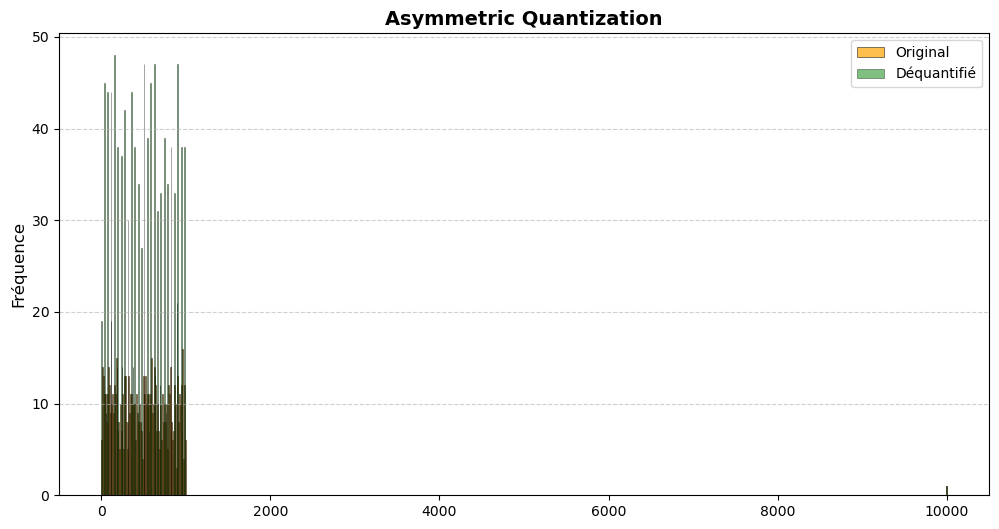

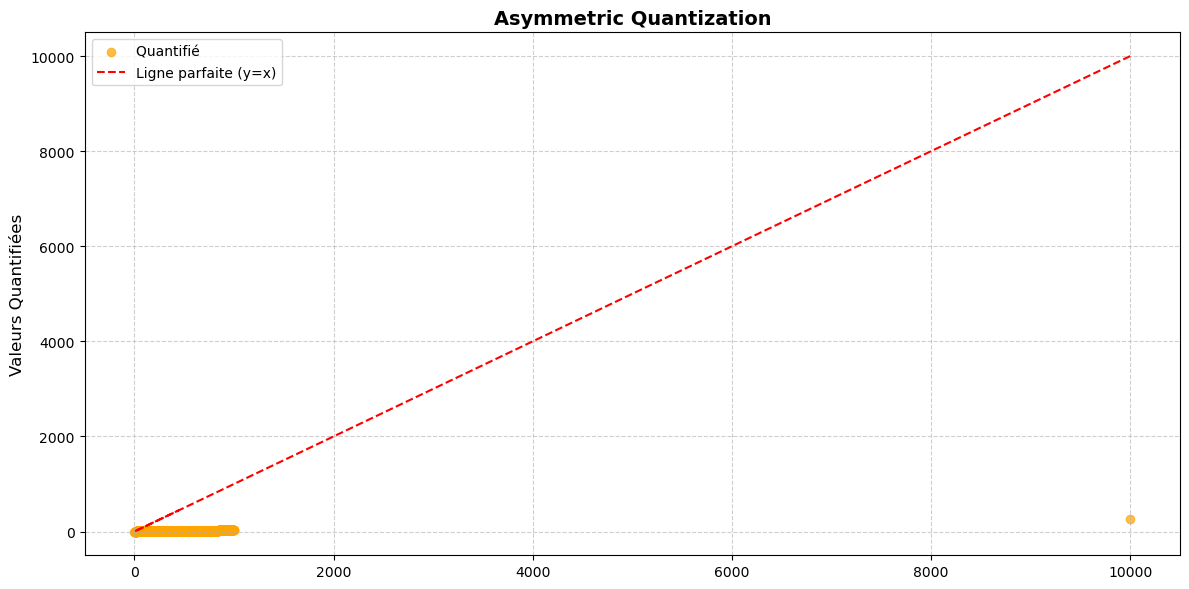

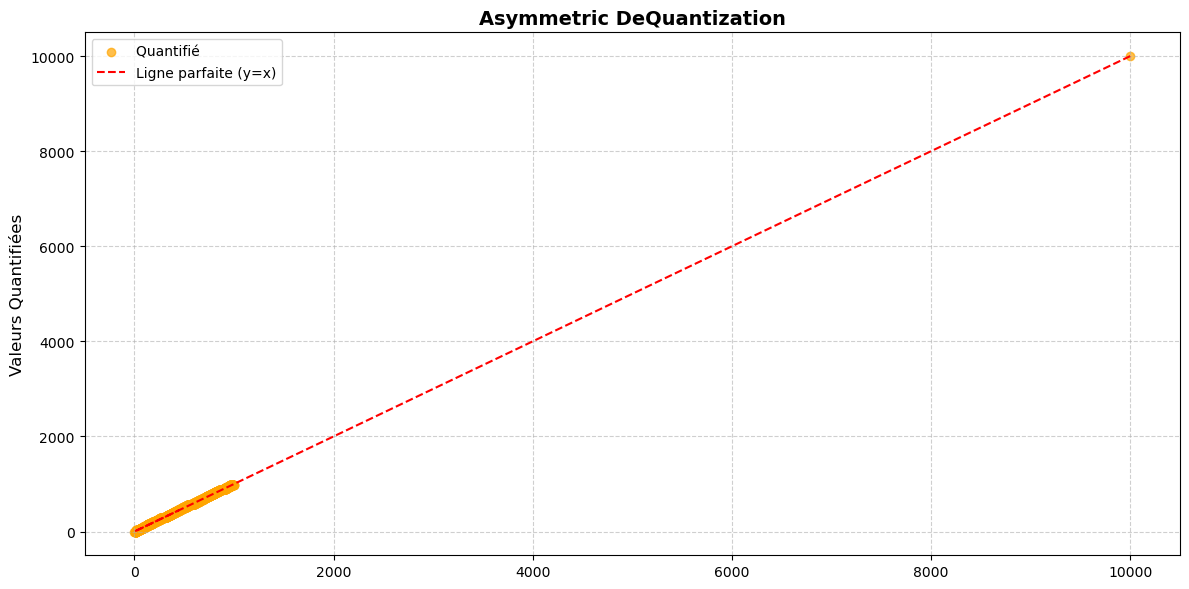

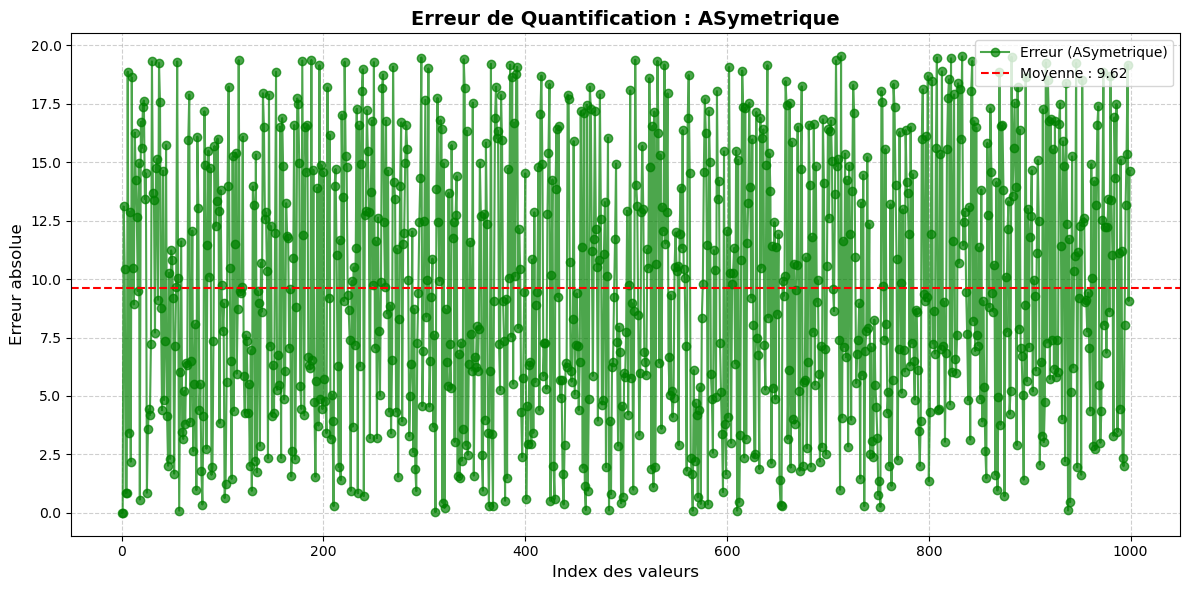

In [4]:
#--------------------ASymetric--------------------#
# Affichage des premières valeurs
print("Exemple des valeurs générées : ", x_original[:11])
x_q_asym, scale_asym, zero_point = quantize_asymmetric(x_original,n_bits)
print("Exemple des valeurs asymetric quantif : ", x_q_asym[:11])
# Déquantification
x_dequant_asym = (x_q_asym - zero_point) * scale_asym
print("Exemple des valeurs asymetric dequantif : ", x_dequant_asym[:11])
# Erreur de quantification
mse_asym, mae_asym = calculate_errors(x_original, x_dequant_asym)
# Print results
print(f"Asymmetric Quantization: MSE={mse_asym:.4f}, MAE={mae_asym:.4f}")

aberrant_index = np.where(x_original == aberrant_value)[0][0]

# Exclure la valeur aberrante
x_original_no_outlier = np.delete(x_original, aberrant_index)
x_asym_dequant_no_outlier = np.delete(x_dequant_asym, aberrant_index)

# Recalculer la MAE sans la valeur aberrante
mse_asym_no_outlier, mae_asym_no_outlier = calculate_errors(x_original_no_outlier, x_asym_dequant_no_outlier)
print(f"MAE sans inclure la valeur aberrante : {mae_asym_no_outlier:.4f}")

plot_histograms(x_original, x_dequant_asym, "Asymmetric Quantization", 'green')
plot_original_vs_quantized(x_original, x_q_asym, "Asymmetric Quantization", 'green')
plot_original_vs_quantized(x_original, x_dequant_asym, "Asymmetric DeQuantization", 'green')

plot_error(x_original, x_dequant_asym, "ASymetrique", c='green')


# <a id='toc8_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 2.3 Quantification Symétrique </b></div>](#toc8_)



##### Quantification symétrique :
- Convertit une série de nombres en virgule flottante dans l’intervalle $[-\alpha, \alpha]$ vers un intervalle symétrique en entiers $[-(2^{n-1} - 1), 2^{n-1} - 1]$. 
- Par exemple, avec 8 bits, cet intervalle est $[-127, 127]$.

**Formules associées :**
- Quantification :  
  $$
  x_q = \text{clamp}\left(\left\lfloor \frac{x_f}{s} \right\rfloor; -(2^{n-1} - 1), 2^{n-1} - 1\right), \quad s = \frac{\text{abs}(\alpha)}{2^{n-1} - 1}
  $$
- Déquantification :  
  $$
  x_f = s \left( x_q \right)
  $$

**Illustration :**

<img src="./sources/sym.png" alt="Quantification symétrique" width="700">

In [5]:
def quantize_symmetric(x, n_bits):
    alpha = np.max(np.abs(x))
    scale = abs(alpha) / (2**(n_bits - 1) - 1)
    x_q = np.clip(np.round(x / scale), -(2**(n_bits - 1)), 2**(n_bits - 1) - 1)
    return x_q, scale

Exemple des valeurs générées :  [10000.          0.        731.99396   598.6585    156.01865   155.99452
    58.08361   866.17615   601.115     708.0726 ]
Exemple des valeurs symetric quantif :  [127.   0.   9.   8.   2.   2.   1.  11.   8.   9.]
Exemple des valeurs symetric dequantif :  [10000.          0.        708.66144   629.92126   157.48032   157.48032
    78.74016   866.1417    629.92126   708.66144]
Symmetric Quantization: MSE=539.0464, MAE=20.1641
MAE sans inclure la valeur aberrante : 20.1843


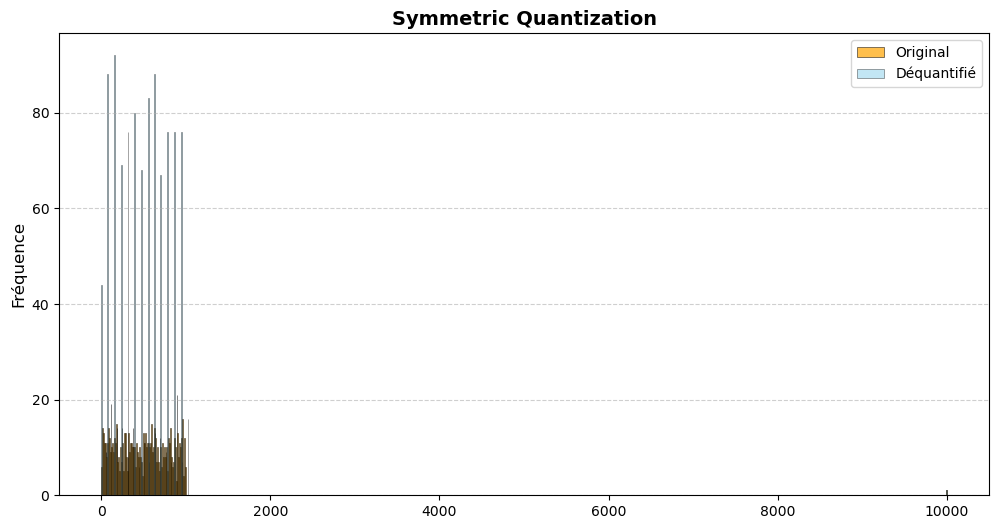

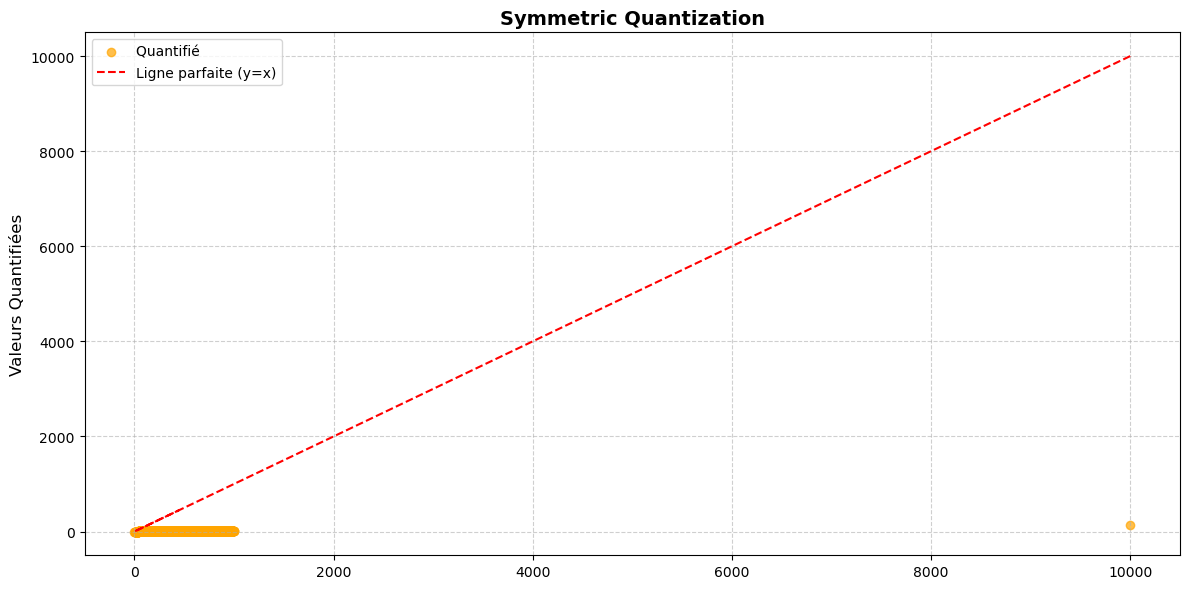

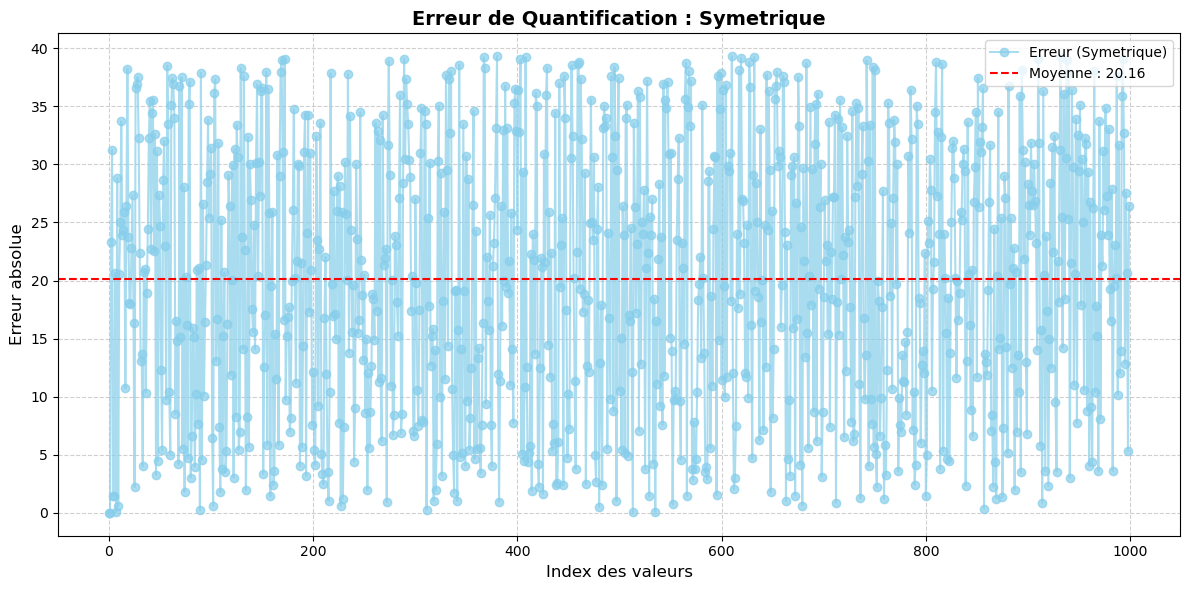

In [6]:
#--------------------Symetric--------------------#
print("Exemple des valeurs générées : ", x_original[:10])

x_q_sym, scale_sym = quantize_symmetric(x_original, n_bits)
print("Exemple des valeurs symetric quantif : ", x_q_sym[:10])
# Déquantification
x_dequant_sym = x_q_sym * scale_sym
print("Exemple des valeurs symetric dequantif : ", x_dequant_sym[:10])
# Erreur de quantification
mse_sym, mae_sym = calculate_errors(x_original, x_dequant_sym)
print(f"Symmetric Quantization: MSE={mse_sym:.4f}, MAE={mae_sym:.4f}")


aberrant_index = np.where(x_original == aberrant_value)[0][0]

# Exclure la valeur aberrante
x_original_no_outlier = np.delete(x_original, aberrant_index)
x_sym_dequant_no_outlier = np.delete(x_dequant_sym, aberrant_index)

# Recalculer la MAE sans la valeur aberrante
mse_sym_no_outlier, mae_sym_no_outlier = calculate_errors(x_original_no_outlier, x_sym_dequant_no_outlier)
print(f"MAE sans inclure la valeur aberrante : {mae_sym_no_outlier:.4f}")

# Plot results
plot_histograms(x_original, x_dequant_sym, "Symmetric Quantization", 'skyblue')
plot_original_vs_quantized(x_original, x_q_sym, "Symmetric Quantization", 'skyblue')
plot_error(x_original, x_dequant_sym, "Symetrique", c='skyblue')

# <a id='toc9_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 2.4 Méthode de quantification par Percentile</b></div>](#toc9_)


**Principe :**
La méthode **Percentile** utilise des percentiles ($P_1$ et $P_{99}$) pour définir l'intervalle de quantification, en ignorant les valeurs aberrantes dans les queues de la distribution.

**Étapes d'implémentation :**
1. **Calcul des percentiles :**
   - $P_1 = \text{np.percentile(x, 1)}$
   - $P_{99} = \text{np.percentile(x, 99)}$


**Consigne :** 
Comparez les performances de deux méthodes de quantification, **Min-Max** et **Percentile**, en termes de précision et de robustesse.

**Objectif :** 

Identifier dans quels contextes chaque méthode est la plus adaptée.

p_min 986.6420611572265
p_max 76.89058502197265
Percentile Quantization: MSE=81398.7031, MAE=12.3941
MAE sans inclure la valeur aberrante : 3.3841


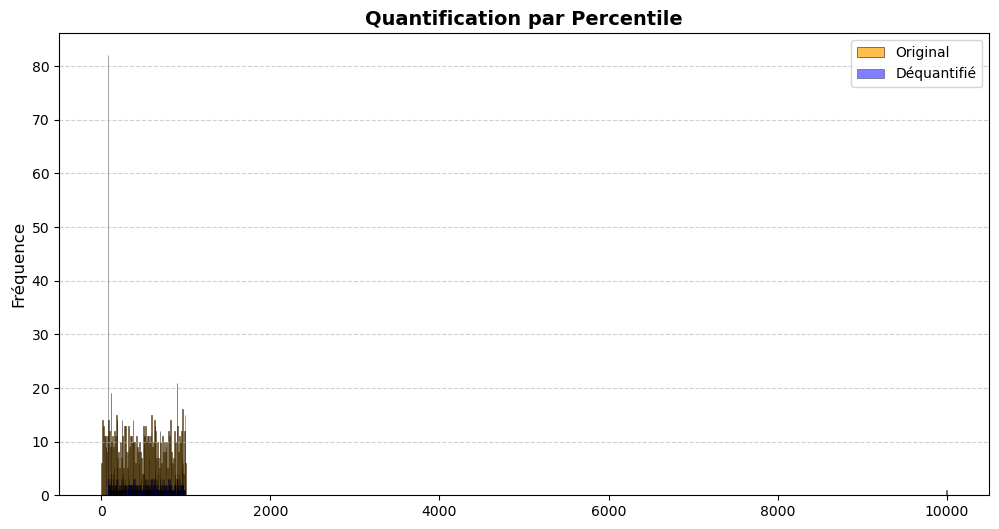

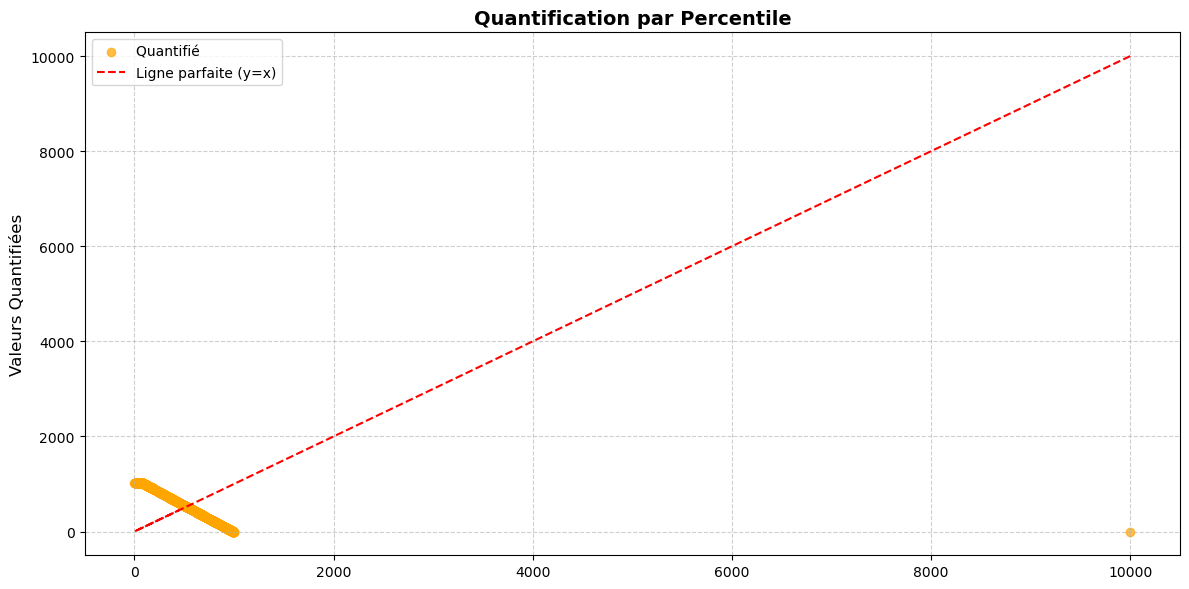

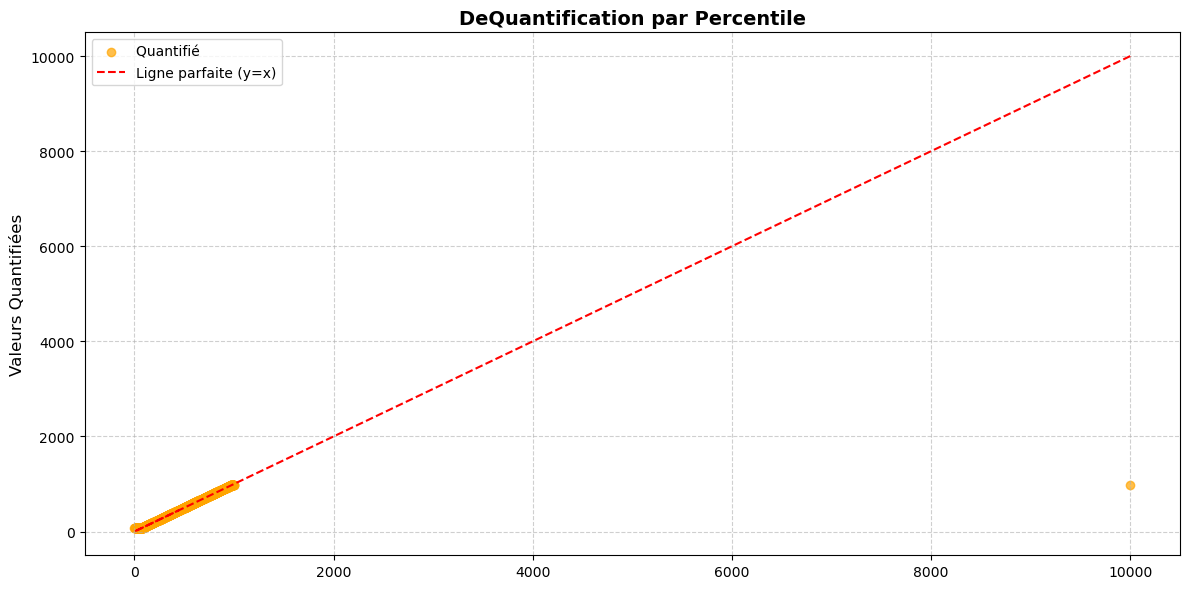

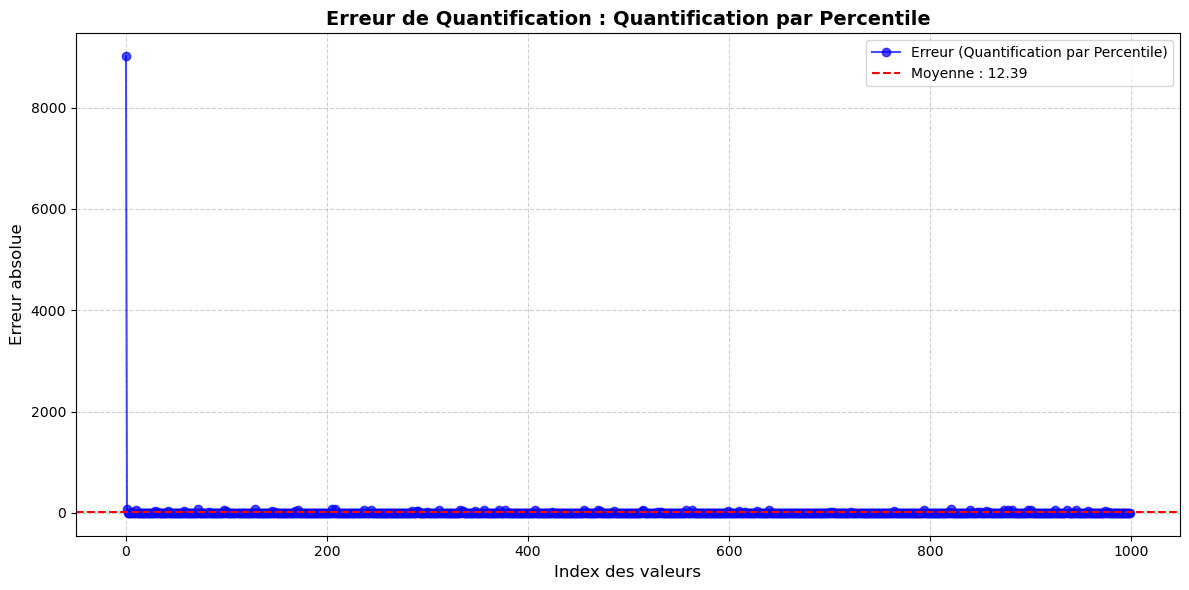

In [7]:
def quantize_percentile(x, n_bits, p_low=1, p_high=99):
    """
    Quantification par percentile.
    Args:
        x: Tableau de données.
        n_bits: Nombre de bits pour la quantification.
        p_low: Percentile bas (par défaut 1%).
        p_high: Percentile haut (par défaut 99%).
    Returns:
        x_q: Valeurs quantifiées.
        s: Échelle utilisée pour la quantification.
        z: Offset (point zéro) utilisé pour la quantification.
    """

    
    # Calcul des percentiles
    p_min = np.percentile(x, p_low)
    p_max = np.percentile(x, p_high)
    print("p_min",p_min)
    print("p_max",p_max)
    # Vérifier si les percentiles sont valides
    if p_min == p_max:
        raise ValueError("Les percentiles bas et haut sont identiques, impossible de quantifier.")

    # Calcul de l'échelle et de l'offset
    s = (p_max - p_min) / (2**n_bits - 1)
    z = -p_min / s

    # Quantification
    x_q_ = np.clip(np.round(x / s + z), 0, 2**n_bits - 1)

    return x_q_, s, z

# Quantification par percentile
x_q_per, scale, zero_point = quantize_percentile(x_original, 10,99, 8)
#print(x_original)
#print(x_q_per)
# Déquantification
x_dequant_per = (x_q_per - zero_point) * scale
#print(x_dequant_per)

# Erreur de quantification
mse_per, mae_per = calculate_errors(x_original, x_dequant_per)
#print(np.abs(x_original - x_dequant_per))
# Print results
print(f"Percentile Quantization: MSE={mse_per:.4f}, MAE={mae_per:.4f}")
# Identifier l'indice de la valeur aberrante
aberrant_index = np.where(x_original == aberrant_value)[0][0]

# Exclure la valeur aberrante
x_original_no_outlier = np.delete(x_original, aberrant_index)
x_dequant_no_outlier = np.delete(x_dequant_per, aberrant_index)

# Recalculer la MAE sans la valeur aberrante
mse_no_outlier, mae_no_outlier = calculate_errors(x_original_no_outlier, x_dequant_no_outlier)
print(f"MAE sans inclure la valeur aberrante : {mae_no_outlier:.4f}")

plot_histograms(x_original, x_dequant_per, "Quantification par Percentile", 'blue')
plot_original_vs_quantized(x_original, x_q_per, "Quantification par Percentile", 'blue')
plot_original_vs_quantized(x_original, x_dequant_per, "DeQuantification par Percentile", 'blue')

plot_error(x_original, x_dequant_per, "Quantification par Percentile", c='blue')

MAE sans inclure la valeur aberrante : 3.3841


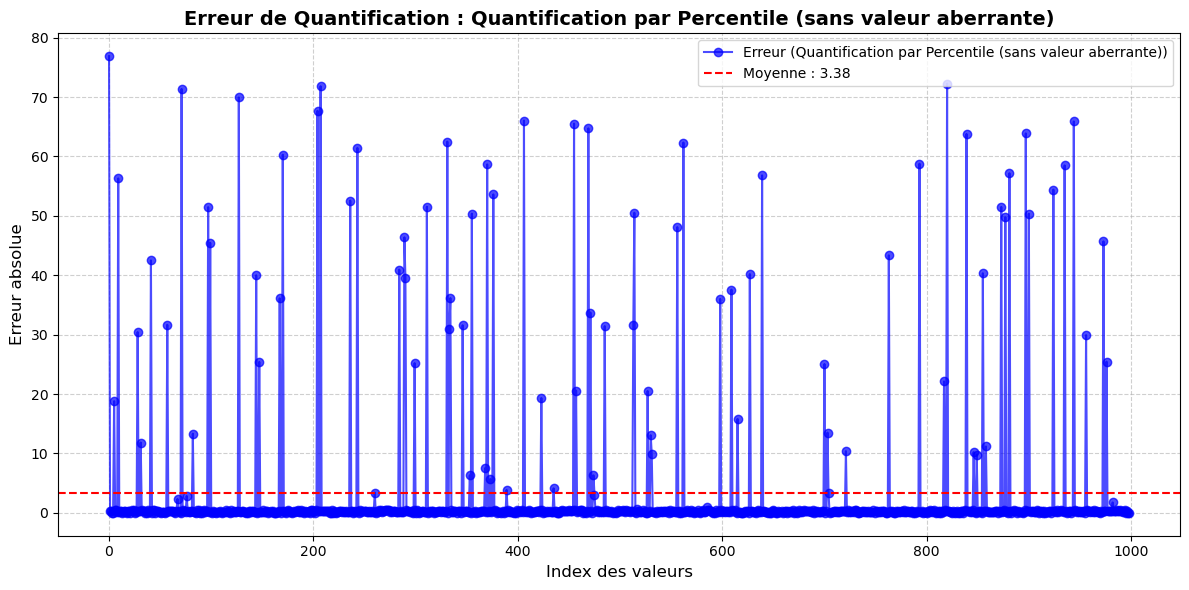

In [8]:
#----   
print(f"MAE sans inclure la valeur aberrante : {mae_no_outlier:.4f}")
plot_error(x_original_no_outlier, x_dequant_no_outlier, "Quantification par Percentile (sans valeur aberrante)", c='blue')


# <a id='toc10_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 2.5 Comparaison : Symetrique, Asymetrique, Min-Max , Percentile </b></div>](#toc10_)



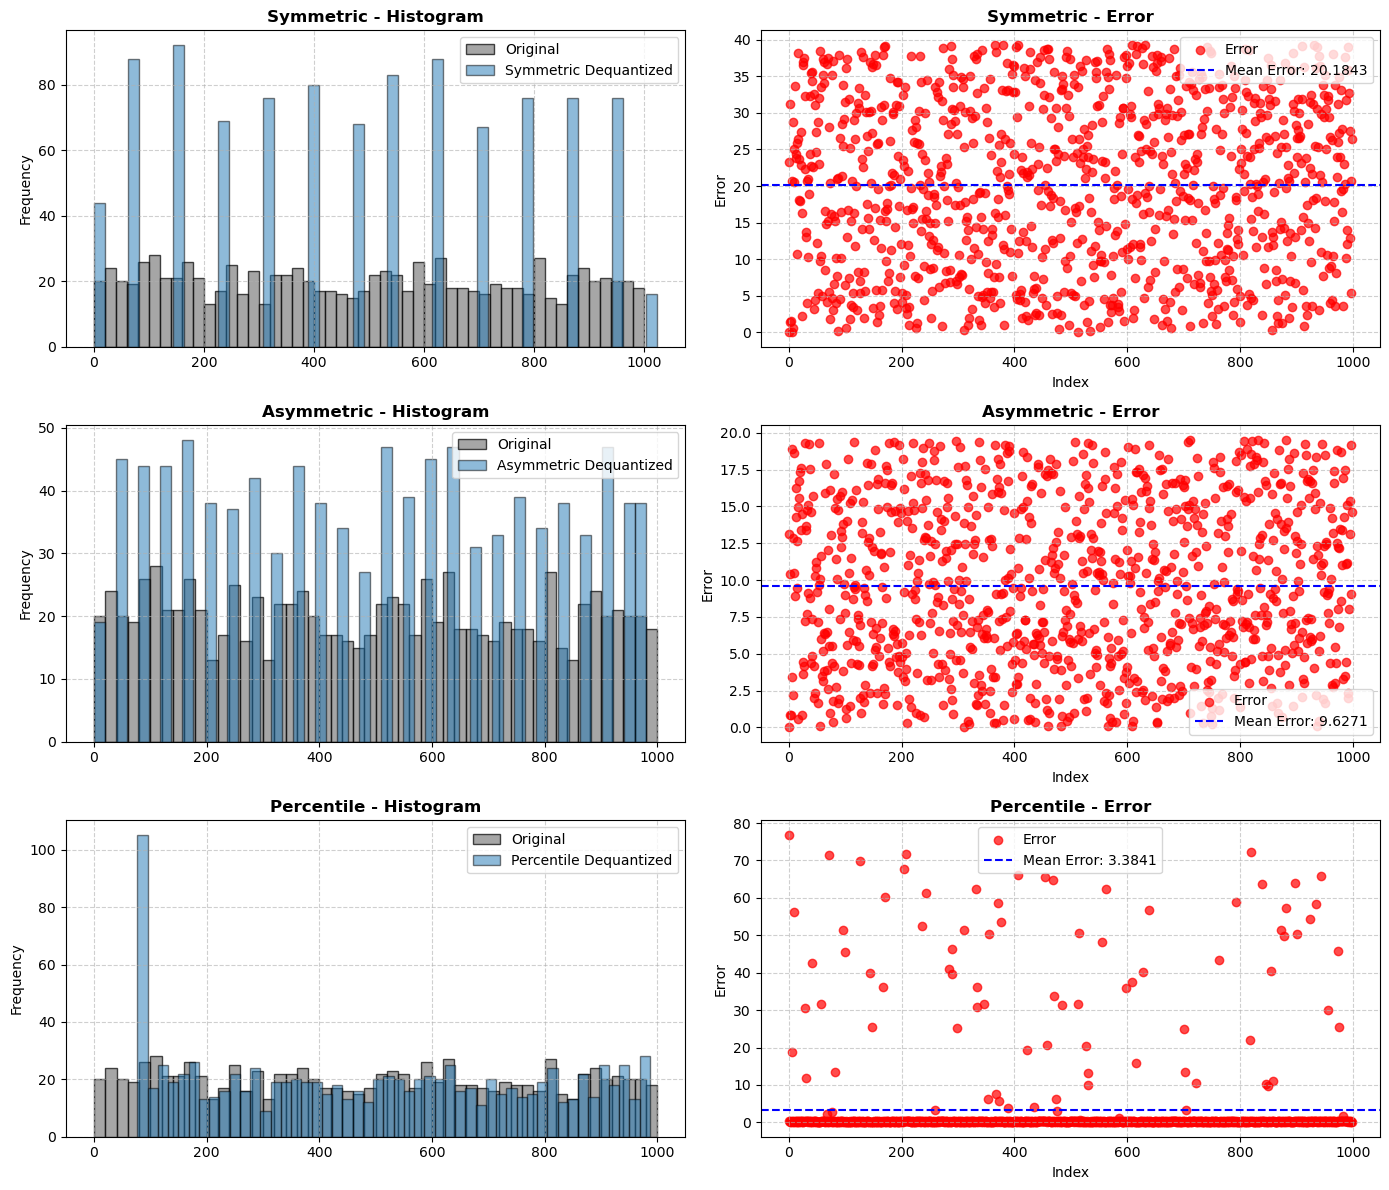

Symmetric
MAE  : 20.1843
Asymmetric
MAE  : 9.6271
Percentile
MAE  : 3.3841


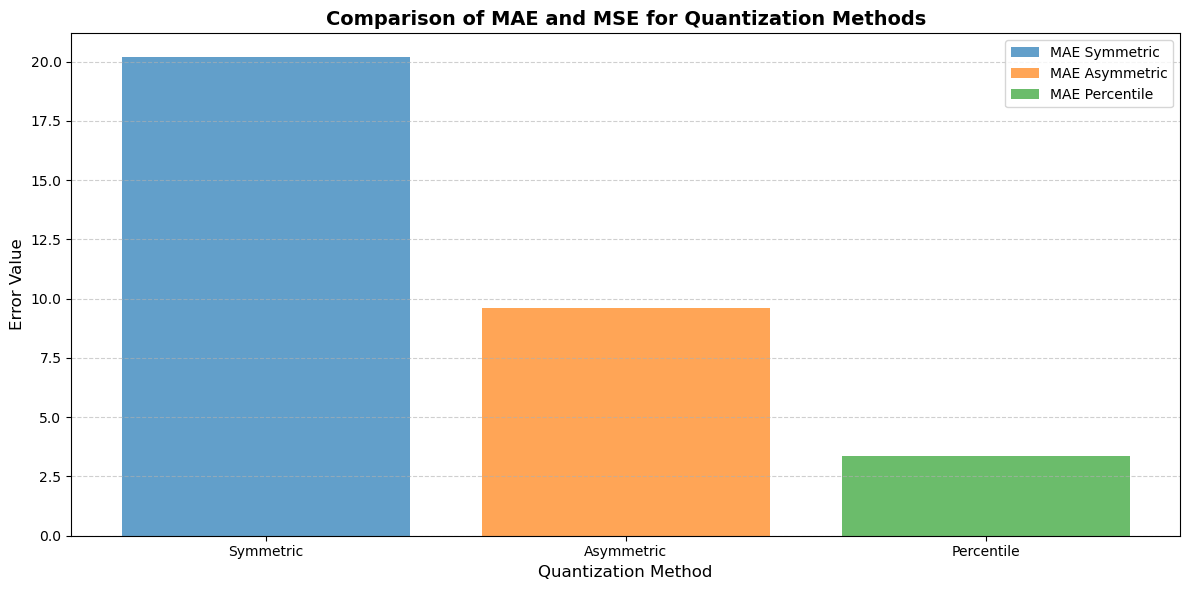

In [9]:
def visualize_comparison(results):
    """
    Visualize and compare the quantification methods: symmetric, asymmetric, and percentile.

    Args:
        results (dict): Dictionary containing results for each method. Each key is the method name,
                        and the value is a tuple (x_original, x_dequant, mse, mae).
    """
    # Prepare subplots
    fig, axes = plt.subplots(3, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1]})
    methods = list(results.keys())

    for i, method in enumerate(methods):
        x_original, x_dequant, mse, mae = results[method]

        # Histogram: Original vs Dequantized
        ax = axes[i, 0]
        ax.hist(x_original, bins=50, alpha=0.7, label="Original", color='gray', edgecolor='black')
        ax.hist(x_dequant, bins=50, alpha=0.5, label=f"{method} Dequantized", edgecolor='black')
        ax.set_title(f"{method} - Histogram", fontsize=12, fontweight='bold')
        ax.set_ylabel("Frequency", fontsize=10)
        ax.legend(frameon=True, fontsize=10)
        ax.grid(alpha=0.6, linestyle="--")

        # Scatter plot: Errors
        ax = axes[i, 1]
        errors = np.abs(x_original - x_dequant)
        ax.scatter(range(len(errors)), errors, alpha=0.7, label="Error", c='red')
        ax.axhline(np.mean(errors), color='blue', linestyle='--', label=f"Mean Error: {np.mean(errors):.4f}")
        ax.set_title(f"{method} - Error", fontsize=12, fontweight='bold')
        ax.set_ylabel("Error", fontsize=10)
        ax.legend(frameon=True, fontsize=10)
        ax.grid(alpha=0.6, linestyle="--")

    # Global layout
    for ax in axes[:, 1]:
        ax.set_xlabel("Index", fontsize=10)
    plt.tight_layout()
    plt.show()

    # Plotting MAE and MSE
    plt.figure(figsize=(12, 6))
    for i, method in enumerate(methods):


        x_original,x_dequant, mse, mae = results[method]
        print(method)
        print(f"MAE  : {mae:.4f}")
        # Plot MAE
        plt.bar(method, mae, alpha=0.7, label='MAE '+method)

        # Plot MSE
        # plt.bar(method, mse,  alpha=0.7, label='MSE '+method)

    # Add labels and title
    plt.title('Comparison of MAE and MSE for Quantization Methods', fontsize=14, fontweight='bold')
    plt.ylabel('Error Value', fontsize=12)
    plt.xlabel('Quantization Method', fontsize=12)
    plt.legend(fontsize=10, frameon=True)

    # Display grid for clarity
    plt.grid(alpha=0.6, linestyle='--', axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()
# Results dictionary
results = {
    "Symmetric": (x_original_no_outlier, x_sym_dequant_no_outlier, mse_sym_no_outlier, mae_sym_no_outlier),
    "Asymmetric": (x_original_no_outlier, x_asym_dequant_no_outlier, mse_asym_no_outlier, mae_asym_no_outlier),
    "Percentile": (x_original_no_outlier,x_dequant_no_outlier,mse_no_outlier, mae_no_outlier)
}

# Visualize the comparison
visualize_comparison(results)




# <a id='toc11_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 2.6 Analyse de l'impact du nombre des bits sur l'erreur </b></div>](#toc11_)

L'erreur dépend de l'intervale des valeurs, de leur distribution et du nombre de bits utilisés pour la quantification. Comme les distributions des poids et des entrées d'un réseau de neurones ne sont pas contrôlées, nous analysons ici l'impact de la largeur des bits sur l'erreur. 

#### Consignes :
Analysez l'impact de la largeur des bits sur l'erreur absolue moyenne en développant un programme qui :

- **Quantifie** et **déquantifie** les données pour différentes largeurs de bits `bitwidths = [i for i in range(2, 16)]
`.
- **Calcule** l'erreur absolue moyenne pour chaque largeur de bits.
- **Visualise** la relation entre la largeur des bits et l'erreur à l'aide d'un graphique.

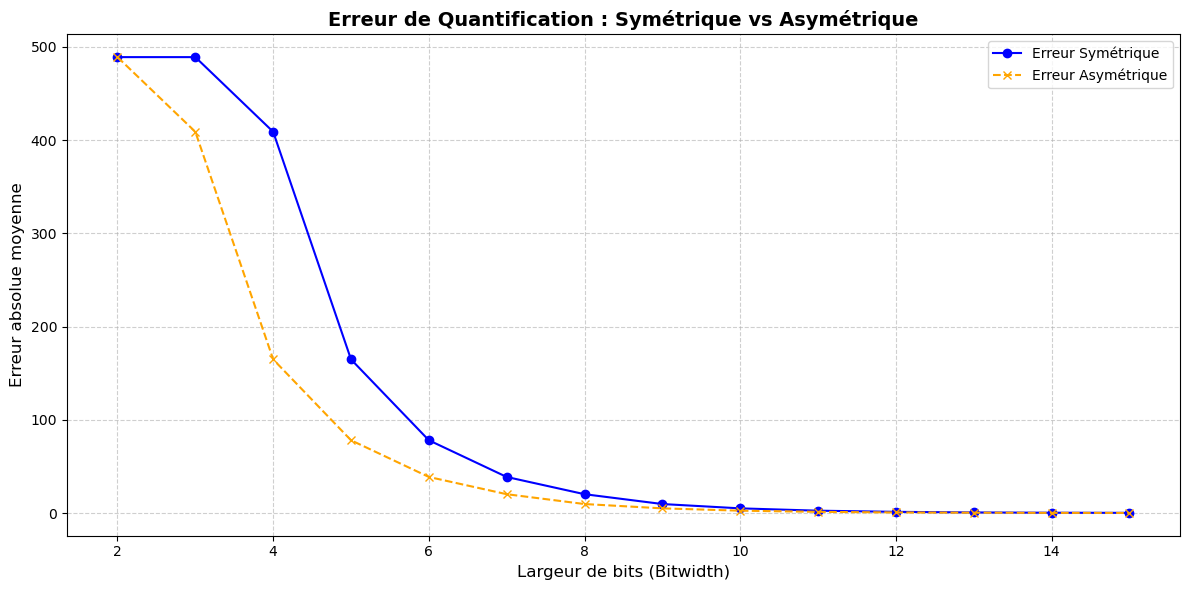

In [10]:
# Listes pour stocker les erreurs
bitwidths = [i for i in range(2, 16)]
bit_errors_sym = []
bit_errors_asym = []

# Boucle pour évaluer l'impact des bitwidths
for n_bits in bitwidths:
    # Quantification symétrique
    x_q_sym, scale_sym = quantize_symmetric(x_original, n_bits)
    x_dequant_sym = x_q_sym * scale_sym
    error_sym = np.mean(np.abs(x_original - x_dequant_sym))
    bit_errors_sym.append(error_sym)
    
    # Quantification asymétrique
    x_q_asym, scale_asym, zero_point = quantize_asymmetric(x_original, n_bits)
    x_dequant_asym = (x_q_asym - zero_point) * scale_asym
    error_asym = np.mean(np.abs(x_original - x_dequant_asym))
    bit_errors_asym.append(error_asym)

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Erreurs pour la quantification symétrique
plt.plot(bitwidths, bit_errors_sym, marker="o", label="Erreur Symétrique", color='blue', linestyle='-')

# Erreurs pour la quantification asymétrique
plt.plot(bitwidths, bit_errors_asym, marker="x", label="Erreur Asymétrique", color='orange', linestyle='--')

# Titre et axes
plt.title("Erreur de Quantification : Symétrique vs Asymétrique", fontsize=14, fontweight='bold')
plt.xlabel("Largeur de bits (Bitwidth)", fontsize=12)
plt.ylabel("Erreur absolue moyenne", fontsize=12)

# Grille et légende
plt.grid(linestyle='--', alpha=0.6)
plt.legend(fontsize=10, frameon=True, loc='upper right')

# Affichage du graphique
plt.tight_layout()
plt.show()

# <a id='toc12_'></a>[<div style="text-align:left; border-radius:8px; padding:8px; color:white; margin:10px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#1E90FF;"><b> 🖼️ 3. Application aux Modèles Complexes </b></div>](#toc12_)
# 

Dans cette section, vous appliquerez des techniques de quantification sur des modèles complexes, comme ceux utilisés pour la classification d'images (par exemple, MNIST). Vous explorerez deux approches principales de quantification : **la quantification après entraînement (PTQ)**, qui est réalisée sur un modèle déjà entraîné, et **la quantification durant l'entraînement (QAT)**, qui permet d'incorporer la quantification directement dans le processus d'entraînement. Vous analyserez l'impact de ces deux méthodes sur la taille du modèle et ses performances.


  ---
  ### <a id='toc1_1_1_'></a>[**Table des matières**](#toc0_)

- [1. Introduction à la quantification](#toc1_)    
  - [1.1 Types de quantification](#toc3_)    
  - [1.2 Les compromis à prendre en compte](#toc4_)    
- [🔍 2. Échauffement : Bases de la quantification](#toc5_)    
  - [2.1 Création d'une série de valeurs](#toc6_)    
  - [2.2 Quantification Asymétrique](#toc7_)    
  - [2.3 Quantification Symétrique](#toc8_)    
  - [2.4 Méthode de quantification par Percentile](#toc9_)    
  - [2.5 Comparaison : Symetrique, Asymetrique, Min-Max , Percentile](#toc10_)    
  - [2.6 Analyse de l'impact du nombre des bits sur l'erreur](#toc11_)    
- [🖼️ 3. Application aux Modèles Complexes](#toc12_)    
  - [3.1 Quantification aprés entrainement (Post Training Quantization PTQ)](#toc13_)    
  - [3.2 Quantification pendant l'entraînement (Quantization Aware Training)](#toc22_)    
 
- [📊 4. Évaluation et comparaison](#toc25_)    
  - [4.1 Comparaison des tailles et des performances des modèles](#toc26_)    
  - [4.2 Conclusion](#toc29_)      
- [Bonus](#toc32_)    

<!-- vscode-jupyter-toc-config
    numbering=false
    anchor=true
    flat=false
    minLevel=1
    maxLevel=6
    /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
  ---

# <a id='toc13_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 3.1 Quantification aprés entrainement (Post Training Quantization PTQ) </b></div>](#toc13_)



La quantification après entraînement (PTQ) consiste à convertir un modèle déjà entraîné en un format plus compact. Nous évaluerons ici l’impact de cette méthode sur la taille et la précision du modèle.


# <a id='toc14_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> a) Définition d’un modèle de classification sur MNIST </b></div>](#toc14_)



**Consigne :**  
Définissez un modèle de classification simple pour le dataset MNIST. Entraînez-le sur un jeu de données normalisé et évaluez sa précision avant d’appliquer une quantification.


In [11]:
# !pip install tensorflow_datasets
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_model_optimization as tfmot
import numpy as np
import os
from pathlib import Path


#--------------------PARAMs--------------------#
# Constants
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
SEED = 42
MODEL_DIR = "./my_models/"


# Ensure reproducibility
tf.random.set_seed(SEED)

# Load the MNIST dataset
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    "mnist",
    split=['train[:85%]', 'train[85%:95%]', 'test'],
    as_supervised=True,
    with_info=True,
)

# Normalize the dataset
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img).batch(BATCH_SIZE).shuffle(10000, seed = SEED)
ds_validation = ds_validation.map(normalize_img).batch(BATCH_SIZE)
ds_test = ds_test.map(normalize_img).batch(1)  # Batch size set to 1 for testing

# Define the model
def create_model():
    """Create and compile a simple feedforward neural network."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

model = create_model()
# Print model summary
print("Model Summary:")
model.summary()



Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# <a id='toc15_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> b)  Entraînement d’un modèle de classification sur MNIST</b></div>](#toc15_)



Epoch 1/10


2025-01-22 16:35:05.089892: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


1594/1594 [==============================] - 2s 687us/step - loss: 0.3188 - accuracy: 0.9081 - val_loss: 0.1647 - val_accuracy: 0.9515
Epoch 2/10
1594/1594 [==============================] - 2s 693us/step - loss: 0.1563 - accuracy: 0.9533 - val_loss: 0.1190 - val_accuracy: 0.9668
Epoch 3/10
1594/1594 [==============================] - 1s 611us/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.1064 - val_accuracy: 0.9698
Epoch 4/10
1594/1594 [==============================] - 1s 613us/step - loss: 0.0944 - accuracy: 0.9708 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 5/10
1594/1594 [==============================] - 1s 649us/step - loss: 0.0811 - accuracy: 0.9745 - val_loss: 0.0900 - val_accuracy: 0.9730
Epoch 6/10
1594/1594 [==============================] - 2s 702us/step - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.0803 - val_accuracy: 0.9777
Epoch 7/10
1594/1594 [==============================] - 1s 637us/step - loss: 0.0628 - accuracy: 0.9795 - val_loss: 0.0844 - val_accura

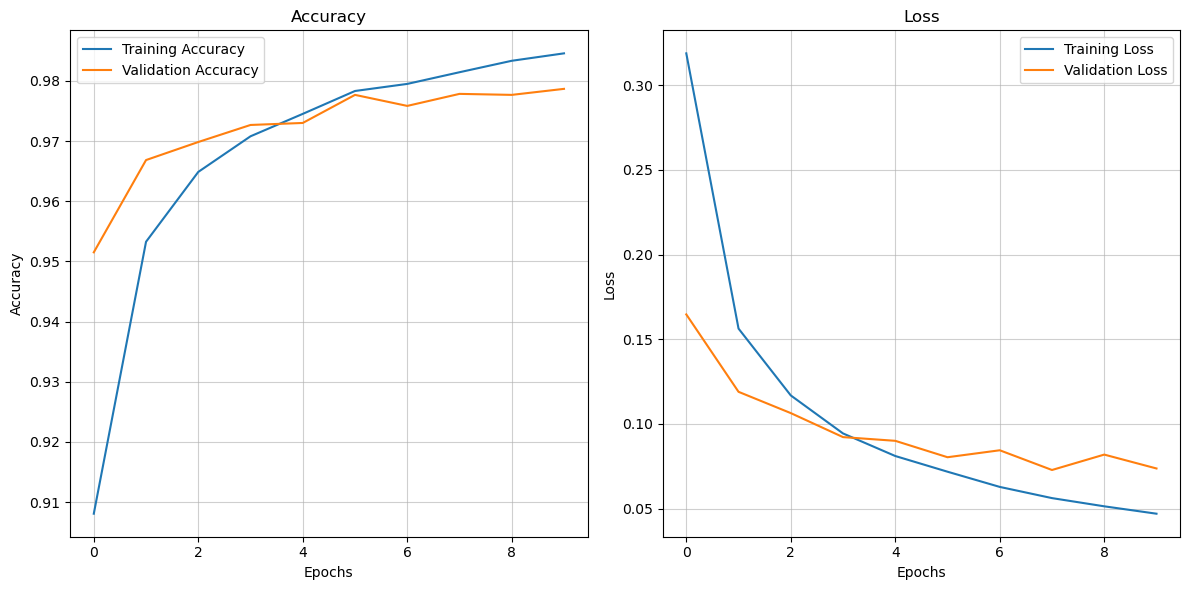

In [12]:
# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=EPOCHS,
)
# Visualize training metrics
def plot_training_history(history):
    """Plot training and validation loss and accuracy."""
    plt.figure(figsize=(12, 6))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(alpha=0.6)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(alpha=0.6)

    plt.tight_layout()
    plt.show()

plot_training_history(history)


# <a id='toc16_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> c) Afficher les poids et la taille du modèle avant la quantification </b></div>](#toc16_)


**Consigne :**  
1. Affichez les poids des différentes couches de votre modèle à l'aide de la méthode `get_weights()`.  
2. Calculez la taille des poids pour chaque couche en mégaoctets (MB) et affichez ces informations de manière structurée.  
3. Calculez la taille totale du modèle sauvegardé en utilisant `os.path.getsize()` pour évaluer la mémoire occupée avant la quantification.  

  
Cette étape vous permettra de comprendre la répartition de la mémoire utilisée par un modèle non quantifié et de comparer ces résultats avec ceux du modèle quantifié.


In [13]:

# Print weights
print("\nModel Weights:")
for layer in model.layers:
    weights = layer.get_weights()
    if weights:  # Skip layers with no weights (e.g., activations, flatten layers)
        print(f"Layer: {layer.name}")
        for i, weight in enumerate(weights):
            print(f"  Weight {i}: shape = {weight.shape}, size = {weight.nbytes / 1e3:.2f} KB")
            print(weight )


Model Weights:
Layer: dense
  Weight 0: shape = (784, 128), size = 401.41 KB
[[ 0.00085361  0.01810665 -0.03550494 ...  0.02007658 -0.05313151
   0.04414182]
 [-0.05202565 -0.00120464 -0.05213944 ... -0.04459335 -0.07169709
  -0.05418617]
 [ 0.0169594   0.0476962   0.02575506 ...  0.05579717  0.02751055
   0.00304689]
 ...
 [-0.04079613  0.05787198 -0.07400276 ... -0.075481    0.06017736
  -0.02413992]
 [-0.03966322 -0.02738332  0.06021533 ... -0.0416276   0.05975983
  -0.04565672]
 [ 0.04664748 -0.00288855 -0.07626064 ...  0.02488657  0.03416712
  -0.02116966]]
  Weight 1: shape = (128,), size = 0.51 KB
[ 0.10893246 -0.03394301  0.10097164 -0.04504086  0.0040491  -0.11471521
  0.08811882 -0.07575497 -0.14036196  0.23535432 -0.13923445 -0.135058
  0.16890644  0.03034343 -0.10147173  0.08270437  0.06575566  0.13727434
  0.33857277  0.0749598  -0.16153938  0.12152342  0.00662647  0.08543582
 -0.1512985   0.15659654 -0.0854212   0.01528765 -0.01930373 -0.05757818
  0.02168483 -0.10218535

# <a id='toc17_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> d) Enregistrer le modèle dans votre espace de travail au format TensorFlow </b></div>](#toc17_)


**Consigne :**  
1. **Création des répertoires** :
   - Créez un répertoire pour stocker le modèle sauvegardé.
   - Assurez-vous que le répertoire existe avant de tenter d'y écrire.

2. **Sauvegarde du modèle** :
   - Sauvegardez le modèle dans le répertoire spécifié en utilisant `model.export()` ou une méthode similaire.

3. **Évaluation du modèle** :
   - Évaluez les performances du modèle sur l’ensemble de test (`ds_test`) en utilisant `model.evaluate()`.
   - Affichez les valeurs de la perte (`loss`) et de la précision (`accuracy`).

4. **Calcul de la taille du modèle** :
   - Calculez la taille totale du modèle sauvegardé (en MB) en parcourant tous les fichiers du répertoire de sauvegarde.
   - Affichez la taille du modèle en utilisant un format lisible.


Cette étape prépare le modèle pour des étapes futures notamment la quantification.


In [14]:
# Save the original model
# Create the directory if it doesn't exist
os.makedirs(MODEL_DIR, exist_ok=True)

saved_model_path = "./my_models/mnist_model_saved"
os.makedirs(saved_model_path, exist_ok=True)
# Save the model
model.export(saved_model_path)

print(f"Model saved to {saved_model_path}")

# Evaluate original model size
loss, accuracy = model.evaluate(ds_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy*100}")
original_size = sum(
    os.path.getsize(os.path.join(dirpath, filename))
    for dirpath, _, filenames in os.walk(saved_model_path)
    for filename in filenames
)
print(f"Original model size: {original_size / 1e6:.2f} MB")

INFO:tensorflow:Assets written to: ./my_models/mnist_model_saved/assets


INFO:tensorflow:Assets written to: ./my_models/mnist_model_saved/assets


Saved artifact at './my_models/mnist_model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='flatten_input')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13400754128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13400753936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13400753552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13400752976: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved to ./my_models/mnist_model_saved
10000/10000 [==============================] - 2s 231us/step - loss: 0.0712 - accuracy: 0.9778
Loss: 0.07115922123193741
Accuracy: 97.78000116348267
Original model size: 0.45 MB


# <a id='toc18_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> e) Fonctions Utilitaires </b></div>](#toc18_)

#### **i. `print_stats_model`**

**Objectif :**  
Analyser les statistiques et les détails des tenseurs d’un modèle TFLite quantifié.

**Arguments :**  
- `model` : Chemin du fichier TFLite.  
- `m_name` : Nom du modèle pour l’affichage.  
- `show_weights` : Affiche les valeurs des poids si activé.

**Exemple d’utilisation :**  
```python
print_stats_model("mnist_model_fp16.tflite", m_name="MNIST Quantized Model", show_weights=False)

In [15]:
def print_stats_model(model, m_name="model", show_weights=False):
    """
    Prints statistics and details about a quantized TFLite model.

    Args:
        model (str): Path to the TFLite model file.
        m_name (str): Model name for display.
        show_weights (bool): Whether to display weight values. Defaults to False.
    """
    try:
        # Print model information
        print(f"\nStats for: {m_name}")
        
        # Evaluate model size
        model_size = os.path.getsize(model)
        print(f"Model size: {model_size / 1e6:.2f} MB")

        # Load the TFLite model
        interpreter = tf.lite.Interpreter(model_path=model)
        interpreter.allocate_tensors()

        # Analyze and print tensor details
        tensor_details = interpreter.get_tensor_details()
        total_weight_size = 0
        print("\nQuantized Model Details:")
        
        for tensor in tensor_details:
            print(f"Tensor Name: {tensor['name']}")
            print(f"  Shape: {tensor['shape']}")
            print(f"  Data Type: {tensor['dtype']}")
            print(f"  Quantization Parameters: {tensor['quantization']}")
            
            # Get the actual tensor data
            weights = interpreter.tensor(tensor['index'])()
            weight_size = weights.nbytes / 1e3  # Convert to KB
            total_weight_size += weight_size
            print(f"  Size: {weight_size:.2f} KB")
            
            if show_weights:
                print(f"  Weights Values: {weights}")
            
            print("-" * 50)

        # Print total weight size
        print(f"\nTotal Weights Size: {total_weight_size / 1e3:.2f} MB")

    except Exception as e:
        print(f"Error processing the model: {e}")

#### **ii. `evaluate_quantized_model`**

**Objectif :**  
Tester les performances d’un modèle TFLite quantifié en évaluant sa précision sur un dataset donné.

 **Arguments :**
- `model_path` : Chemin vers le fichier TFLite contenant le modèle quantifié.
- `dataset` : Dataset TensorFlow utilisé pour l’évaluation, comme `ds_test`.
- `m_name` : Nom du modèle pour l’affichage (par défaut : `"Quantized Model"`).

 **Fonctionnalités :**
1. Charge le modèle TFLite à partir du chemin fourni.
2. Affiche les détails des entrées du modèle, comme la forme (`shape`) et le type (`dtype`).
3. Boucle sur le dataset d’évaluation :
   - Vérifie et ajuste la forme des entrées si nécessaire.
   - Effectue des inférences en utilisant le modèle TFLite.
   - Compare les prédictions aux labels réels pour calculer la précision.
4. Affiche la précision finale (accuracy) du modèle.

 **Exemple d’utilisation :**
```python
# <a id='toc19_'></a>[Évaluation des performances du modèle quantifié](#toc0_)
evaluate_quantized_model("mnist_model_fp16.tflite", ds_test, m_name="MNIST Float16 Quantized Model")

In [16]:
def evaluate_quantized_model(model_path, dataset, m_name="Quantized Model"):
    """
    Evaluates the performance of a quantized TFLite model on a given dataset.

    Args:
        model_path (str): Path to the TFLite model file.
        dataset (tf.data.Dataset): A TensorFlow dataset for evaluation.
        m_name (str): Name of the model for display.
    """
    try:
        if not os.path.exists(model_path):
            print(f"Error: Model file '{model_path}' does not exist.")
            return

        print(f"\nEvaluating {m_name}")

        # Load the TFLite model
        interpreter = tf.lite.Interpreter(model_path=model_path)
        interpreter.allocate_tensors()

        # Get input and output details
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Check input shape and type
        input_shape = input_details[0]['shape']
        input_dtype = input_details[0]['dtype']

        print(f"Model Input Shape: {input_shape}")
        print(f"Model Input Data Type: {input_dtype}")

        # Initialize counters for accuracy calculation
        # Test the model
        correct_predictions = 0
        total_predictions = 0

        for images, labels in ds_test:
            # Remove the batch dimension for single image inference
            input_data = tf.squeeze(images, axis=-1).numpy()  # From [1, 28, 28, 1] to [28, 28, 1]

             # Ensure input_data matches the expected dtype
            #input_data = input_data.astype(input_details[0]['dtype'])
            # Adjust input data based on the model's expected dtype
            if input_dtype == np.uint8:
                input_data = (input_data * 255).astype(np.uint8)  # Scale to [0, 255]
            elif input_dtype == np.float32:
                input_data = input_data.astype(np.float32)  # Keep in [0, 1] range
            else:
                raise ValueError(f"Unsupported input data type: {input_dtype}")

            # Set the tensor to the input data
            interpreter.set_tensor(input_details[0]['index'], input_data)

            # Run inference
            interpreter.invoke()

            # Get the prediction
            output_data = interpreter.get_tensor(output_details[0]['index'])
            predicted_label = np.argmax(output_data)

            # Compare with the true label
            if predicted_label == labels.numpy():
                correct_predictions += 1
            total_predictions += 1

        # Calculate accuracy
        accuracy = correct_predictions / total_predictions * 100
        print(f"Accuracy of the quantized {model_path}: {accuracy:.2f}%")

    except Exception as e:
        print(f"Error evaluating the model: {e}")

# <a id='toc20_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> f) Appliquer une réduction flottante : Quantification FP32 → FP16 </b></div>](#toc20_)



 **Objectif :**
Réduire la taille d’un modèle en convertissant ses poids de précision flottante simple (FP32) vers une précision flottante réduite (FP16). Cela permet d’économiser de l’espace de stockage et d’accélérer l’inférence sur des appareils compatibles avec le calcul FP16.

 **Étapes à suivre :**

1. **Convertir le modèle en TFLite (FP16)**  
   Utiliser la quantification post-entraînement pour convertir un modèle TensorFlow en format TFLite avec des poids en FP16.



 **Ressources complémentaires :**

Pour en savoir plus sur la quantification flottante avec TensorFlow Lite, consultez cet [article de blog](https://blog.tensorflow.org/2019/08/tensorflow-model-optimization-toolkit_5.html).

In [17]:
# Apply post-training quantization (Float16)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set the target type to float16
converter.target_spec.supported_types = [tf.float16]

# Convert the model to Float16
tflite_model_fp16 = converter.convert()

# Save the Float16 TFLite model
fp16_model_path = "./my_models/mnist_model_fp16.tflite"
os.makedirs(os.path.dirname(fp16_model_path), exist_ok=True)  # Ensure directory exists
with open(fp16_model_path, "wb") as f:
    f.write(tflite_model_fp16)
print(f"Float16 quantized model saved to: {fp16_model_path}")


Float16 quantized model saved to: ./my_models/mnist_model_fp16.tflite


W0000 00:00:1737560122.589121 6577021 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1737560122.589133 6577021 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-22 16:35:22.589342: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./my_models/mnist_model_saved
2025-01-22 16:35:22.589603: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-22 16:35:22.589608: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: ./my_models/mnist_model_saved
I0000 00:00:1737560122.590971 6577021 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-01-22 16:35:22.591150: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-22 16:35:22.598129: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: ./my_models/mnist_model_saved
2025-01-22 16:35:22.601224: I tensorflow/cc


#### **Afficher des statistiques sur le modèle quantifié en FP16**

 **Objectif :**
Analyser le modèle quantifié en FP16 pour obtenir des informations détaillées sur sa structure, ses dimensions, les paramètres de quantification et la taille de ses poids.

 **Étapes à suivre :** utiliser les foncttions utilitaires



In [18]:
# Evaluate FP16 quantized model
print_stats_model(fp16_model_path, m_name="Quantized fp16 model",show_weights=True)
evaluate_quantized_model(fp16_model_path, ds_test, m_name="MNIST Float16 Quantized Model")



Stats for: Quantized fp16 model
Model size: 0.21 MB

Quantized Model Details:
Tensor Name: serving_default_flatten_input:0
  Shape: [ 1 28 28]
  Data Type: <class 'numpy.float32'>
  Quantization Parameters: (0.0, 0)
  Size: 3.14 KB


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


  Weights Values: [[[ 0.0000000e+00  0.0000000e+00  7.3260274e-37  1.4012985e-45
    0.0000000e+00  0.0000000e+00  9.1745737e-18  4.2038954e-45
              nan            nan  9.0904238e-18  4.2038954e-45
              nan            nan  5.3813062e-18  4.2038954e-45
              nan            nan  8.6873684e-18  4.2038954e-45
              nan            nan  0.0000000e+00  0.0000000e+00
              nan            nan  1.0427677e-09  4.2038954e-45]
  [           nan            nan  0.0000000e+00  0.0000000e+00
              nan            nan  0.0000000e+00  0.0000000e+00
    6.1560898e+03  4.2038954e-45  7.3259543e-37  1.4012985e-45
              nan            nan  1.0065921e-09  4.2038954e-45
              nan            nan  1.0431194e-09  4.2038954e-45
              nan            nan  0.0000000e+00  0.0000000e+00
              nan            nan  4.9911078e-16  4.2038954e-45]
  [ 2.4432512e-35  1.4012985e-45  7.3257821e-37  1.4012985e-45
              nan            nan  3

2025-01-22 16:35:23.401430: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# <a id='toc21_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> e) Appliquer une Quantification FP32 --> INT8 et enregistrer le nouveau modèle quantifié</b></div>](#toc21_)


**Objectif :**
Réduire la précision du modèle en passant de FP32 à INT8 pour diminuer sa taille et améliorer ses performances sur des appareils aux ressources limitées.

 **Étapes à suivre :**

1. **Configurer le convertisseur TFLite pour la quantification INT8 :**
   - Charger le modèle au format TensorFlow.
   - Définir une optimisation de type INT8.
   - Spécifier un jeu de données représentatif pour calibrer la quantification.

2. **Effectuer la conversion :**
   Convertir le modèle TensorFlow en un modèle TFLite quantifié en INT8.

3. **Enregistrer le modèle converti :**
   Sauvegarder le modèle quantifié au format `.tflite`.

**Ressources complémentaires :**

Pour en savoir plus sur la quantification entière avec TensorFlow Lite, consultez cet [article de blog](https://blog.tensorflow.org/2019/06/tensorflow-integer-quantization.html?hl=fr).

In [19]:
# Apply post-training quantization (INT8)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define representative dataset function
def representative_data_gen():
    for image, _ in ds_train.take(100):  # Use a subset of the test dataset
        yield [image]

converter.representative_dataset = representative_data_gen
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8  # Input type for inference
converter.inference_output_type = tf.uint8  # Output type for inference

# Convert to a quantized TFLite model
tflite_model_int8 = converter.convert()


# Save the quantized model
quantized_model_path = "./my_models/mnist_model_int8.tflite"
with open(quantized_model_path, "wb") as f:
    f.write(tflite_model_int8)
print(f"Quantized model saved to: {quantized_model_path}")




W0000 00:00:1737560123.510593 6577021 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1737560123.510603 6577021 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-22 16:35:23.510740: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./my_models/mnist_model_saved
2025-01-22 16:35:23.510969: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-22 16:35:23.510974: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: ./my_models/mnist_model_saved
2025-01-22 16:35:23.512203: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-22 16:35:23.519784: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: ./my_models/mnist_model_saved
2025-01-22 16:35:23.522421: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 11682 microseconds.


Quantized model saved to: ./my_models/mnist_model_int8.tflite


2025-01-22 16:35:24.025337: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


#### **Afficher des statistiques sur le modèle quantifié en INT8**

 **Objectif :**
Analyser le modèle quantifié en INT8 pour obtenir des informations détaillées sur sa structure, ses dimensions, les paramètres de quantification et la taille de ses poids.

 **Étapes à suivre :** utiliser les foncttions utilitaires



In [20]:
print_stats_model(quantized_model_path, m_name="Quantized int8 model", show_weights=True)



Stats for: Quantized int8 model
Model size: 0.11 MB

Quantized Model Details:
Tensor Name: serving_default_flatten_input:0
  Shape: [ 1 28 28]
  Data Type: <class 'numpy.uint8'>
  Quantization Parameters: (0.003921568859368563, 0)
  Size: 0.78 KB
  Weights Values: [[[  0   0   0   0   0   0   0   0 179  89 148  31   3   0   0   0   0
     0   0   0   0   0   0   0 179  90 148  31]
  [  3   0   0   0  32  91 148  31   3   0   0   0 192  91 148  31   3
     0   0   0  96  92 148  31   3   0   0   0]
  [  0  93 148  31   3   0   0   0 160  93 148  31   3   0   0   0  64
    94 148  31   3   0   0   0 224  94 148  31]
  [  3   0   0   0 128  95 148  31   3   0   0   0  32  96 148  31   3
     0   0   0 192  96 148  31   3   0   0   0]
  [ 96  97 148  31   3   0   0   0   0  98 148  31   3   0   0   0  64
    99 148  31   3   0   0   0  32 101 148  31]
  [  3   0   0   0   0 108 131  31   3   0   0   0   0 113 131  31   3
     0   0   0 160 113 131  31   3   0   0   0]
  [ 64 114 131  31  

In [21]:
evaluate_quantized_model(quantized_model_path, ds_test, m_name="MNIST int8 Quantized Model")


Evaluating MNIST int8 Quantized Model
Model Input Shape: [ 1 28 28]
Model Input Data Type: <class 'numpy.uint8'>
Accuracy of the quantized ./my_models/mnist_model_int8.tflite: 97.74%


# <a id='toc22_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 3.2 Quantification pendant l'entraînement (Quantization Aware Training) </b></div>](#toc22_)


# <a id='toc23_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> a) Quantification complète du modèle </b></div>](#toc23_)



**Objectif :**  
Dans cette section, nous appliquons la quantification pendant l'entraînement à un modèle complet. Cela consiste à intégrer des opérations de quantification et de déquantification dans le flux d'entraînement du modèle, afin d'améliorer ses performances en conditions réelles tout en réduisant sa taille.

**Consigne :**  
- Implémentez la quantization aware training (QAT) sur l'intégralité du modèle. 
- Entraînez le modèle sur le dataset MNIST pour démontrer l'efficacité de cette technique.
- Comparez les performances du modèle quantifié avec celles du modèle original.

In [22]:



# Apply quantization-aware training (QAT) wrapper
qat_model = tfmot.quantization.keras.quantize_model( create_model())
qat_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model

history_qat = qat_model.fit(ds_train, validation_data=ds_validation, epochs=EPOCHS)



Epoch 1/10


/Users/bouzid-s/anaconda3/lib/python3.12/site-packages/tf_keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1594/1594 [==============================] - 2s 891us/step - loss: 0.3144 - accuracy: 0.9091 - val_loss: 0.1613 - val_accuracy: 0.9553
Epoch 2/10
1594/1594 [==============================] - 2s 953us/step - loss: 0.1512 - accuracy: 0.9545 - val_loss: 0.1136 - val_accuracy: 0.9672
Epoch 3/10
1594/1594 [==============================] - 2s 924us/step - loss: 0.1140 - accuracy: 0.9655 - val_loss: 0.0955 - val_accuracy: 0.9708
Epoch 4/10
1594/1594 [==============================] - 2s 870us/step - loss: 0.0916 - accuracy: 0.9716 - val_loss: 0.0932 - val_accuracy: 0.9710
Epoch 5/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.0787 - accuracy: 0.9758 - val_loss: 0.0801 - val_accuracy: 0.9770
Epoch 6/10
1594/1594 [==============================] - 2s 997us/step - loss: 0.0710 - accuracy: 0.9773 - val_loss: 0.0783 - val_accuracy: 0.9770
Epoch 7/10
1594/1594 [==============================] - 2s 890us/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 0.0866 - val_accuracy

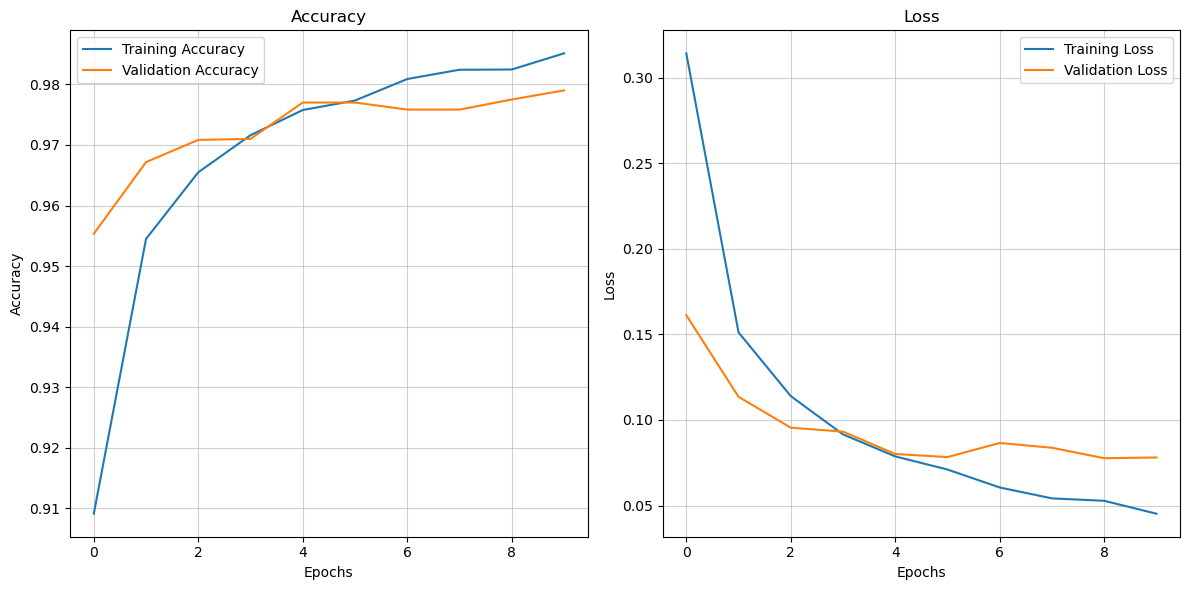

10000/10000 [==============================] - 3s 302us/step - loss: 0.0712 - accuracy: 0.9800
Loss: 0.07115296274423599
Accuracy: 98.00000190734863


In [23]:
plot_training_history(history_qat)

# Evaluate original model size
loss, accuracy = qat_model.evaluate(ds_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy*100}")

# <a id='toc24_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> b) Quantification partielle du modèle </b></div>](#toc24_)

**Objectif :**  
Dans cette section, nous appliquons la quantization aware training (QAT) uniquement à certaines couches du modèle. Cela permet de maintenir un compromis entre la réduction de la taille et la conservation de performances élevées.

**Consigne :**  
- Sélectionnez uniquement la couche dense du modèle pour appliquer la quantification.
- Entraînez le modèle sur le dataset MNIST en intégrant cette quantification partielle.
- Comparez les performances du modèle quantifié partiellement avec celles du modèle original et du modèle entièrement quantifié.


In [24]:
quantize_annotate_layer = tfmot.quantization.keras.quantize_annotate_layer

# Define a simple model
quant_part_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    quantize_annotate_layer(tf.keras.layers.Dense(128, activation='relu')),
    tf.keras.layers.Dense(10)
])

quant_part_model = tfmot.quantization.keras.quantize_apply(quant_part_model)
# Apply quantization-aware training (QAT) wrapper
quant_part_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
quant_part_model.fit(ds_train, epochs=EPOCHS, validation_data=ds_validation)





Epoch 1/10
1594/1594 [==============================] - 2s 819us/step - loss: 0.2780 - accuracy: 0.9202 - val_loss: 0.1594 - val_accuracy: 0.9553
Epoch 2/10
1594/1594 [==============================] - 2s 825us/step - loss: 0.1253 - accuracy: 0.9626 - val_loss: 0.1160 - val_accuracy: 0.9660
Epoch 3/10
1594/1594 [==============================] - 2s 872us/step - loss: 0.0864 - accuracy: 0.9741 - val_loss: 0.0969 - val_accuracy: 0.9735
Epoch 4/10
1594/1594 [==============================] - 2s 799us/step - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0982 - val_accuracy: 0.9723
Epoch 5/10
1594/1594 [==============================] - 2s 783us/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0869 - val_accuracy: 0.9770
Epoch 6/10
1594/1594 [==============================] - 2s 865us/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0800 - val_accuracy: 0.9765
Epoch 7/10
1594/1594 [==============================] - 2s 885us/step - loss: 0.0311 - accuracy: 0.9910 - val_loss: 0.0982 -

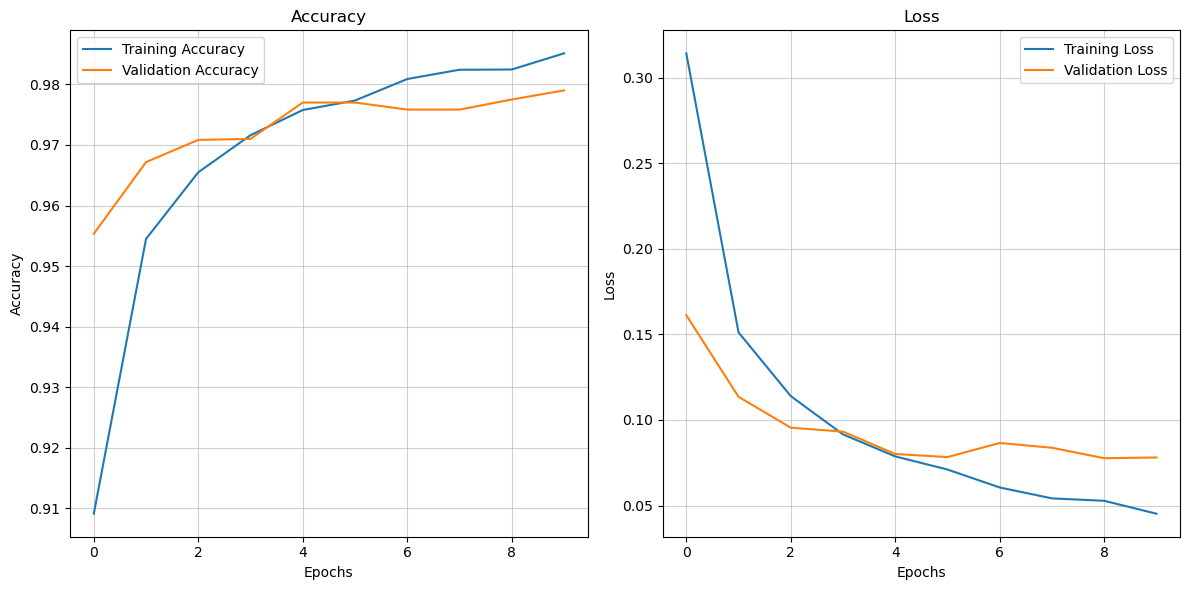

10000/10000 [==============================] - 3s 255us/step - loss: 0.0886 - accuracy: 0.9765
Loss: 0.08859195560216904
Accuracy: 97.64999747276306


In [25]:
# Evaluate  model size
plot_training_history(history_qat)
loss, accuracy = quant_part_model.evaluate(ds_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy*100}")

# <a id='toc25_'></a>[<div style="text-align:left; border-radius:8px; padding:8px; color:white; margin:10px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#1E90FF;"><b> 📊 4. Évaluation et comparaison </b></div>](#toc25_)


  ---
  ### <a id='toc1_1_1_'></a>[**Table des matières**](#toc0_)

- [1. Introduction à la quantification](#toc1_)    
  - [1.1 Types de quantification](#toc3_)    
  - [1.2 Les compromis à prendre en compte](#toc4_)    
- [🔍 2. Échauffement : Bases de la quantification](#toc5_)    
  - [2.1 Création d'une série de valeurs](#toc6_)    
  - [2.2 Quantification Asymétrique](#toc7_)    
  - [2.3 Quantification Symétrique](#toc8_)    
  - [2.4 Méthode de quantification par Percentile](#toc9_)    
  - [2.5 Comparaison : Symetrique, Asymetrique, Min-Max , Percentile](#toc10_)    
  - [2.6 Analyse de l'impact du nombre des bits sur l'erreur](#toc11_)    
- [🖼️ 3. Application aux Modèles Complexes](#toc12_)    
  - [3.1 Quantification aprés entrainement (Post Training Quantization PTQ)](#toc13_)    
  - [3.2 Quantification pendant l'entraînement (Quantization Aware Training)](#toc22_)    
 
- [📊 4. Évaluation et comparaison](#toc25_)    
  - [4.1 Comparaison des tailles et des performances des modèles](#toc26_)    
  - [4.2 Conclusion](#toc29_)      
- [Bonus](#toc32_)    

<!-- vscode-jupyter-toc-config
    numbering=false
    anchor=true
    flat=false
    minLevel=1
    maxLevel=6
    /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
  ---
  
# <a id='toc26_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 4.1 Comparaison des tailles et des performances des modèles </b></div>](#toc26_)


**Objectif :**  
L'objectif de cette section est d'analyser l'impact de la quantification sur la taille et les performances des modèles. Nous allons comparer les modèles Float32 (modèle original), Float16 et INT8 en termes de taille et de précision.

---
# <a id='toc27_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> a) Étape 1 : Afficher la taille des modèles </b></div>](#toc27_)


Utilisez la fonction `print_stats_model` pour calculer et afficher les tailles respectives des modèles Float32, Float16 et INT8. Cela permettra d'observer la réduction de taille obtenue grâce à chaque méthode de quantification.



# <a id='toc28_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> b) Étape 2 : Comparer les performances des modèles </b></div>](#toc28_)

#### **Objectif :**
Évaluer et comparer les performances des modèles Float32, Float16 et INT8 sur le jeu de test pour analyser l'impact de la quantification.




# <a id='toc29_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:70%; font-family:Arial, sans-serif; background-color:#f17c12;"><b> 4.2 Conclusion </b></div>](#toc29_)

# <a id='toc30_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> a)  Flottant ou entière </b></div>](#toc30_)

1. **Taille des modèles :**  
   - La quantification Float16 permet une réduction significative de la taille du modèle tout en conservant une précision proche de celle du modèle original Float32.
   - La quantification INT8 offre une réduction de taille encore plus importante, au prix d'une éventuelle perte de précision.

2. **Performances des modèles :**  
   - Le modèle Float16 conserve une précision élevée, rendant cette méthode idéale lorsque les contraintes de mémoire ne sont pas strictes.  
   - Le modèle INT8 peut subir une dégradation plus marquée de la précision, mais reste adapté pour des environnements où les contraintes de stockage et de calcul sont prioritaires (comme les appareils embarqués).

3. **Compromis taille-précision :**  
   - Le choix de la méthode de quantification dépend des besoins spécifiques de votre application :  
     - **Float16 :** Meilleur compromis entre taille et précision.  
     - **INT8 :** Réduction maximale de la taille pour des applications nécessitant une faible empreinte mémoire.


La quantification constitue une technique puissante pour optimiser les modèles tout en répondant aux contraintes matérielles spécifiques. Il est essentiel d’évaluer chaque approche dans le contexte de votre cas d’utilisation pour choisir la méthode optimale.

# <a id='toc31_'></a>[<div style="text-align:left; border-radius:6px; padding:6px; color:white; margin:5px 0; font-size:50%; font-family:Arial, sans-serif; background-color:#115175;"><b> b) Intégrale ou partielle </b></div>](#toc31_)


1. **Quantification intégrale :**  
   - La quantification complète d'un modèle (toutes les couches) permet une réduction maximale de la taille et des ressources nécessaires pour l'inférence.  
   - Cependant, elle peut entraîner une dégradation de précision plus importante, en particulier pour les modèles complexes ou les tâches nécessitant une grande sensibilité.

2. **Quantification partielle :**  
   - La quantification partielle (appliquée uniquement à certaines couches, par exemple les couches entièrement connectées ou convolutives) offre un compromis intéressant.  
   - Elle permet de réduire la taille et les besoins en calcul tout en limitant l’impact sur la précision globale du modèle.  
   - Cette approche est particulièrement utile pour des modèles critiques, où certaines couches doivent conserver leur précision d'origine pour garantir des performances optimales.

3. **Choix entre intégrale et partielle :**  
   - Le choix entre une quantification intégrale ou partielle dépend des priorités de votre application :  
     - **Quantification intégrale :** Convient aux environnements contraints en mémoire et en calcul, où une certaine dégradation de précision est acceptable.  
     - **Quantification partielle :** Convient lorsque la précision est une priorité tout en bénéficiant d'une optimisation partielle des ressources.

La quantification partielle est souvent privilégiée pour son équilibre entre réduction des ressources et préservation des performances. Une analyse approfondie du modèle et des besoins spécifiques de l'application est nécessaire pour faire le bon choix.



# <a id='toc32_'></a>[<div style="text-align:center; border-radius:8px; padding:8px; color:white; margin:10px 0; font-size:100%; font-family:Arial, sans-serif; background-color:#1E90FF;"><b> Bonus</b></div>](#toc0_)

<a href="https://colab.research.google.com/github/sayakpaul/Adventures-in-TensorFlow-Lite/blob/master/Boundless_TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



  ---
  ### <a id='toc1_1_1_'></a>[**Table des matières**](#toc0_)

- [1. Introduction à la quantification](#toc1_)    
  - [1.1 Types de quantification](#toc3_)    
  - [1.2 Les compromis à prendre en compte](#toc4_)    
- [🔍 2. Échauffement : Bases de la quantification](#toc5_)    
  - [2.1 Création d'une série de valeurs](#toc6_)    
  - [2.2 Quantification Asymétrique](#toc7_)    
  - [2.3 Quantification Symétrique](#toc8_)    
  - [2.4 Méthode de quantification par Percentile](#toc9_)    
  - [2.5 Comparaison : Symetrique, Asymetrique, Min-Max , Percentile](#toc10_)    
  - [2.6 Analyse de l'impact du nombre des bits sur l'erreur](#toc11_)    
- [🖼️ 3. Application aux Modèles Complexes](#toc12_)    
  - [3.1 Quantification aprés entrainement (Post Training Quantization PTQ)](#toc13_)    
  - [3.2 Quantification pendant l'entraînement (Quantization Aware Training)](#toc22_)    
 
- [📊 4. Évaluation et comparaison](#toc25_)    
  - [4.1 Comparaison des tailles et des performances des modèles](#toc26_)    
  - [4.2 Conclusion](#toc29_)      
- [Bonus](#toc32_)    

<!-- vscode-jupyter-toc-config
    numbering=false
    anchor=true
    flat=false
    minLevel=1
    maxLevel=6
    /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
  ---